In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [2]:
df = pd.read_csv('MacbethColorChecker.csv')
light = pd.read_csv('LED_3000K.csv')
XYZ = pd.read_csv('XYZ_Color_Function.csv')[3:84]

In [3]:
light = light/np.amax(light)

C:\Users\robin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [4]:
df.drop('Unnamed: 25', axis=1, inplace=True)
df.drop('Patch Numbers', axis=1, inplace=True)
df.drop('wavelength', axis=1, inplace=True)

wavelength = range(380, 785, 5)

In [5]:
light.drop('wavelength', axis=1, inplace=True)

In [6]:
XYZ = XYZ.rename(columns = {XYZ.columns[0]:'wave', XYZ.columns[1]:'X', XYZ.columns[2]:'Y', XYZ.columns[3]:'Z'})
XYZ.reset_index(drop=True, inplace = True)
X_Bar, Y_Bar, Z_Bar = XYZ['X'], XYZ['Y'], XYZ['Z']
XYZ.drop('wave', axis=1, inplace=True)
X_Bar=pd.DataFrame(X_Bar)
Y_Bar=pd.DataFrame(Y_Bar)
Z_Bar=pd.DataFrame(Z_Bar)

In [7]:
X_light = pd.DataFrame(light.values*X_Bar.values, columns=light.columns, index=light.index)
Y_light = pd.DataFrame(light.values*Y_Bar.values, columns=light.columns, index=light.index)
Z_light = pd.DataFrame(light.values*Z_Bar.values, columns=light.columns, index=light.index)

In [8]:
X_light=X_light.sum()
Y_light=Y_light.sum()
Z_light=Z_light.sum()

Y = Y_light.tolist()[0]

In [9]:
Y

15.064186562433893

In [10]:
df_light = pd.DataFrame(df.values*light.values, columns=df.columns, index=df.index)

In [11]:
x_bar = pd.DataFrame(df_light.values*X_Bar.values, columns=df_light.columns, index=df_light.index)

y_bar = pd.DataFrame(df_light.values*Y_Bar.values, columns=df_light.columns, index=df_light.index)

z_bar = pd.DataFrame(df_light.values*Z_Bar.values, columns=df_light.columns, index=df_light.index)


In [12]:
x_bar = pd.DataFrame(x_bar.sum())/Y
y_bar = pd.DataFrame(y_bar.sum())/Y
z_bar = pd.DataFrame(z_bar.sum())/Y

x_bar.head(), y_bar.head(), z_bar.head()

(          0
 1  0.134409
 2  0.463233
 3  0.169475
 4  0.113343
 5  0.257509,
           0
 1  0.110827
 2  0.387308
 3  0.171928
 4  0.127149
 5  0.227997,
           0
 1  0.021610
 2  0.095082
 3  0.124642
 4  0.025564
 5  0.163035)

In [13]:
var_R = pd.DataFrame(x_bar*3.2406 + y_bar*-1.5372 + z_bar*-0.4986, columns=x_bar.columns, index=x_bar.index)
var_G = pd.DataFrame(x_bar*-0.9686 + y_bar*1.8758 + z_bar*0.0415, columns=x_bar.columns, index=x_bar.index)
var_B = pd.DataFrame(x_bar*0.0557 + y_bar*-0.2040 + z_bar*1.0570, columns=x_bar.columns, index=x_bar.index)

In [14]:
r,g,b = var_R.iloc[:,0].tolist(), var_G.iloc[:,0].tolist(), var_B.iloc[:,0].tolist()

In [15]:
r_cor, g_cor, b_cor = [], [], []

for i in range(len(r)):
    if r[i] > 1:
        r_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif r[i] <= 0.0:
        r_temp = 0.0
    elif r[i] <= 0.0031308:
        r_temp = 12.92*r[i]
    else:
        r_temp = (1 + 0.055)*((r[i]**(1/2.4)) - 0.055)
        
    r_cor.append(r_temp)

for i in range(len(g)):
    if g[i] > 1:
        g_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif g[i] <= 0.0:
        g_temp = 0.0    
    elif g[i] <= 0.0031308:
        g_temp = 12.92*g[i]
    else:
        g_temp = (1 + 0.055)*((g[i]**(1/2.4)) - 0.055)
        
    g_cor.append(g_temp)
    
for i in range(len(b)):
    if b[i] > 1:
        b_temp = (1 + 0.055)*((1**(1/2.4)) - 0.055)
    elif b[i] <= 0.0:
        b_temp = 0.0
    elif b[i] <= 0.0031308:
        b_temp = 12.92*b[i]
    else:
        b_temp = (1 + 0.055)*((b[i]**(1/2.4)) - 0.055)
        
    b_cor.append(b_temp)

In [16]:
rgb = zip(r_cor,g_cor,b_cor)

rgb = list(rgb)

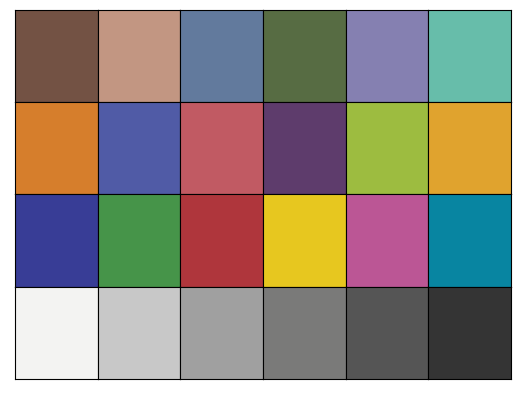

In [17]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_facecolor('#735244')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_facecolor('#c29682')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_facecolor('#627a9d')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_facecolor('#576c43')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_facecolor('#8580b1')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_facecolor('#67bdaa')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_facecolor('#d67e2c')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_facecolor('#505ba6')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_facecolor('#c15a63')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_facecolor('#5e3c6c')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_facecolor('#9dbc40')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_facecolor('#e0a32e')
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_facecolor('#383d96')
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_facecolor('#469449')
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_facecolor('#af363c')
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_facecolor('#e7c71f')
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_facecolor('#bb5695')
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_facecolor('#0885a1')
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_facecolor('#f3f3f2')
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_facecolor('#c8c8c8')
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_facecolor('#a0a0a0')
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_facecolor('#7a7a79')
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_facecolor('#555555')
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_facecolor('#343434')

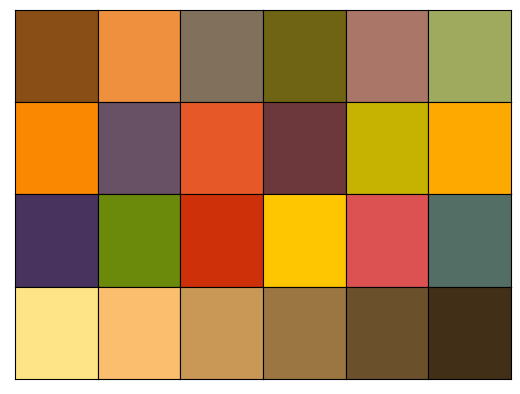

In [18]:
fig, ax = plt.subplots(4,6)
fig.subplots_adjust(wspace=0, hspace=0)

ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_facecolor(rgb[0])
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].set_facecolor(rgb[1])
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].set_facecolor(rgb[2])
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].set_facecolor(rgb[3])
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].set_facecolor(rgb[4])
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].set_facecolor(rgb[5])
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_facecolor(rgb[6])
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].set_facecolor(rgb[7])
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].set_facecolor(rgb[8])
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].set_facecolor(rgb[9])
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].set_facecolor(rgb[10])
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].set_facecolor(rgb[11])
ax[2,0].yaxis.set_visible(False)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_facecolor(rgb[12])
ax[2,1].yaxis.set_visible(False)
ax[2,1].xaxis.set_visible(False)
ax[2,1].set_facecolor(rgb[13])
ax[2,2].yaxis.set_visible(False)
ax[2,2].xaxis.set_visible(False)
ax[2,2].set_facecolor(rgb[14])
ax[2,3].yaxis.set_visible(False)
ax[2,3].xaxis.set_visible(False)
ax[2,3].set_facecolor(rgb[15])
ax[2,4].yaxis.set_visible(False)
ax[2,4].xaxis.set_visible(False)
ax[2,4].set_facecolor(rgb[16])
ax[2,5].yaxis.set_visible(False)
ax[2,5].xaxis.set_visible(False)
ax[2,5].set_facecolor(rgb[17])
ax[3,0].yaxis.set_visible(False)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_facecolor(rgb[18])
ax[3,1].yaxis.set_visible(False)
ax[3,1].xaxis.set_visible(False)
ax[3,1].set_facecolor(rgb[19])
ax[3,2].yaxis.set_visible(False)
ax[3,2].xaxis.set_visible(False)
ax[3,2].set_facecolor(rgb[20])
ax[3,3].yaxis.set_visible(False)
ax[3,3].xaxis.set_visible(False)
ax[3,3].set_facecolor(rgb[21])
ax[3,4].yaxis.set_visible(False)
ax[3,4].xaxis.set_visible(False)
ax[3,4].set_facecolor(rgb[22])
ax[3,5].yaxis.set_visible(False)
ax[3,5].xaxis.set_visible(False)
ax[3,5].set_facecolor(rgb[23])